In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datasets import load_dataset
from itertools import product

from tqdm.notebook import tqdm


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def inverse_sigmoid(y):
    if np.any((y <= 0) | (y >= 1)):
        raise ValueError("Input must be in the open interval (0, 1)")
    return np.log(y / (1 - y))

inverse_sigmoid_vectorized = np.vectorize(inverse_sigmoid)


mean_len = 108.87
std_len = 49.6549
mean_socratic = 2.6069
std_socratic = 1.2291


In [ ]:
from huggingface_hub import hf_hub_download, list_repo_files
import os

repo_id = "mukhea5/new-gsm8k-grpo-evals"
repo_type = "dataset"
#download_dir = "gsm8k_csvs"

# List all files in the repo
files = list_repo_files(repo_id=repo_id, repo_type=repo_type)

print(files)
print(len(files))

['.gitattributes', 'grpo_maxmin_eval_seed123_prop0.01.csv', 'grpo_maxmin_eval_seed123_prop0.05.csv', 'grpo_maxmin_eval_seed123_prop0.1.csv', 'grpo_maxmin_eval_seed123_prop0.15.csv', 'grpo_maxmin_eval_seed123_prop0.2.csv', 'grpo_maxmin_eval_seed42_prop0.01.csv', 'grpo_maxmin_eval_seed42_prop0.05.csv', 'grpo_maxmin_eval_seed42_prop0.1.csv', 'grpo_maxmin_eval_seed42_prop0.15.csv', 'grpo_maxmin_eval_seed42_prop0.2.csv', 'grpo_shared_pref_eval_seed123_prop0.01_k16.csv', 'grpo_shared_pref_eval_seed123_prop0.01_k2.csv', 'grpo_shared_pref_eval_seed123_prop0.01_k8.csv', 'grpo_shared_pref_eval_seed123_prop0.05_k16.csv', 'grpo_shared_pref_eval_seed123_prop0.05_k2.csv', 'grpo_shared_pref_eval_seed123_prop0.05_k8.csv', 'grpo_shared_pref_eval_seed123_prop0.15_k16.csv', 'grpo_shared_pref_eval_seed123_prop0.15_k2.csv', 'grpo_shared_pref_eval_seed123_prop0.15_k8.csv', 'grpo_shared_pref_eval_seed123_prop0.1_k16.csv', 'grpo_shared_pref_eval_seed123_prop0.1_k2.csv', 'grpo_shared_pref_eval_seed123_prop0.1_

## Gold Reward

In [3]:
seeds = [123, 314]
all_gold_dfs = []

for seed in seeds:
    file_name = f"gsm8k_gold_eval_{seed}.csv"
    if file_name in files:
        file_path = hf_hub_download(repo_id=repo_id, repo_type=repo_type, filename=file_name)
        df = pd.read_csv(file_path)
        df["seed"] = seed
        all_gold_dfs.append(df)

# Concatenate all dataframes
if all_gold_dfs:
    combined_gold_df = pd.concat(all_gold_dfs, ignore_index=True)
    print("Combined DataFrame created.")
else:
    print("No files found, combined DataFrame not created.")



combined_gold_df["socratic_score"] = sigmoid((combined_gold_df["socratic_score"]-mean_socratic)/std_socratic)
combined_gold_df["conciseness"] = 1-sigmoid((combined_gold_df["length"]-mean_len)/std_len)
combined_gold_df["majority_score"] = combined_gold_df["conciseness"]*0.8 + 0.2*combined_gold_df["accuracy"]
combined_gold_df["minority_score"] = combined_gold_df["socratic_score"]*0.8 + 0.2*combined_gold_df["accuracy"]
#combined_gold_df["question"] = combined_gold_df["question"].apply(format_prompt)

combined_gold_df

Combined DataFrame created.


,question,answer,generated_text,accuracy,length,socratic_score,seed,conciseness,majority_score,minority_score
0,"Q: If there are 3 apples and you eat one, how ...",Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,Total eggs 16. Eggs eaten 3. Eggs baked 4. Egg...,1,26,0.591085,123,0.841432,0.873145,0.672868
1,"Q: If there are 3 apples and you eat one, how ...",It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...,Blue fiber: 2 bolts. White fiber: 1 bolt. So 2...,1,18,0.189810,123,0.861765,0.889412,0.351848
2,"Q: If there are 3 apples and you eat one, how ...",The cost of the house and repairs came out to ...,"Initial cost $80,000. Repairs $50,000. Total c...",0,28,0.138594,123,0.835983,0.668787,0.110875
3,"Q: If there are 3 apples and you eat one, how ...",He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...,Sprints per week: 3. Sprints per sprint: 3. To...,1,22,0.511308,123,0.851887,0.881509,0.609046
4,"Q: If there are 3 apples and you eat one, how ...","If each chicken eats 3 cups of feed per day, t...",Total feed needed per day. Chickens count. So ...,1,35,0.373397,123,0.815728,0.852582,0.498718
...,...,...,...,...,...,...,...,...,...,...
2633,"Q: If there are 3 apples and you eat one, how ...",Dora is 12-3=<<12-3=9>>9\nSo James is 9*2=<<9*...,John's age now 35. Son age now 16. Son age in ...,0,18,0.313470,314,0.861765,0.689412,0.250776
2634,"Q: If there are 3 apples and you eat one, how ...",There are 60 minutes in an hour. Ana peels an ...,Total minutes 60. Ana peels 10 oranges. Jane p...,1,17,0.369089,314,0.864147,0.891318,0.495271
2635,"Q: If there are 3 apples and you eat one, how ...",The discount on the radiator was 400*.8=$<<400...,Cost of radiator 320. Cost of mechanic 150. To...,0,14,0.121429,314,0.871085,0.696868,0.097143
2636,"Q: If there are 3 apples and you eat one, how ...",Let C be the number of chickens.\nThere are 20...,Total animals 20. Total legs 70. Chickens 10. ...,0,16,0.684226,314,0.866494,0.693195,0.547381


In [4]:
mean_gold_min_score = combined_gold_df["minority_score"].mean().item()
sem_gold_min_score = combined_gold_df["minority_score"].sem().item()

mean_gold_maj_score = combined_gold_df["majority_score"].mean().item()
sem_gold_maj_score = combined_gold_df["majority_score"].sem().item()

print("- Mean Gold Minority Score:", mean_gold_min_score)
print("- SEM Gold Minority Score:", sem_gold_min_score)
print()
print("- Mean Gold Majority Score:", mean_gold_maj_score)
print("- SEM Gold Majority Score:", sem_gold_maj_score) 

- Mean Gold Minority Score: 0.41453692978445056
- SEM Gold Minority Score: 0.0032619289734337528

- Mean Gold Majority Score: 0.7843923115308477
- SEM Gold Majority Score: 0.002034416314563246


## SharedRep

In [5]:
FEW_SHOT_PREFIX = """Q: If there are 3 apples and you eat one, how many are left?
A: Let's think step by step. There are 3 apples. You eat one. So 3 - 1 = 2. The answer is 2.
 
Q: Tom had 4 pencils. He gave 1 to Sarah and bought 3 more. How many does he have now?
A: Let's think step by step. He had 4 and gave away 1, so 4 - 1 = 3. Then he bought 3, so 3 + 3 = 6. The answer is 6."""

def format_prompt(question):
    return FEW_SHOT_PREFIX + f"\n\nQ: {question}\nA: Let's think step by step and once confident, provide a final answer."


# SharedRep files:

k_vals = [2, 8, 16]
seeds = [42, 123]
proportions = [0.01, 0.05, 0.1, 0.15, 0.2]
combinations = list(product(seeds, proportions, k_vals))



# Prepare to store dataframes
all_SR_dfs = []

for seed, proportion, k in tqdm(combinations, desc="Downloading files"):
    file_name = f"grpo_shared_pref_eval_seed{seed}_prop{proportion}_k{k}.csv"
    if file_name in files:
        file_path = hf_hub_download(repo_id=repo_id, repo_type=repo_type, filename=file_name)
        df = pd.read_csv(file_path)
        df["seed"] = seed
        # if seed == 42:
        #     #print(df.columns)
        # if seed==123:
        #     #print(df.columns)
        #     #df.drop(columns=["socratic"], inplace=True)
        #     df.rename(columns={"socratic": "socratic_raw"}, inplace=True)
        all_SR_dfs.append(df)


# Concatenate all dataframes
if all_SR_dfs:
    combined_SR_df = pd.concat(all_SR_dfs, ignore_index=True)
    print("Combined DataFrame created.")
else:
    print("No files found, combined DataFrame not created.")


combined_SR_df.drop(columns=["score_majority", "score_minority", "unnormalized_length_score", "unnormalized_score_majority", "unnormalized_score_minority", "new_score_majority", "new_score_minority"], inplace=True)

combined_SR_df["socratic_score"] = sigmoid((combined_SR_df["socratic_raw"]-mean_socratic)/std_socratic)
combined_SR_df["conciseness"] = 1-sigmoid((combined_SR_df["length"]-mean_len)/std_len)
combined_SR_df["majority_score"] = combined_SR_df["conciseness"]*0.8 + 0.2*combined_SR_df["is_correct"]
combined_SR_df["minority_score"] = combined_SR_df["socratic_score"]*0.8 + 0.2*combined_SR_df["is_correct"]

combined_SR_df["question"] = combined_SR_df["question"].apply(format_prompt)


combined_SR_df

Combined DataFrame created.


,proportion,k,question,gold_answer,model_completion,predicted_answer,is_correct,length,socratic_raw,seed,socratic,socratic_score,conciseness,majority_score,minority_score
0,0.01,2,"Q: If there are 3 apples and you eat one, how ...",Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,She lays 16 eggs per day. She eats 3 for break...,18,1.0,54,1.810793,42,NaN,0.343505,0.751201,0.800961,0.474804
1,0.01,2,"Q: If there are 3 apples and you eat one, how ...",It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...,The blue fiber is 2 bolts. The white fiber is ...,3.,0.0,43,1.293138,42,NaN,0.255616,0.790270,0.632216,0.204493
2,0.01,2,"Q: If there are 3 apples and you eat one, how ...",The cost of the house and repairs came out to ...,"The initial cost of the house was $80,000. He ...",000,0.0,65,1.587303,42,NaN,0.303741,0.707547,0.566037,0.242993
3,0.01,2,"Q: If there are 3 apples and you eat one, how ...",He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...,"James runs 3 sprints a week, and each sprint i...",180.,0.0,32,0.863850,42,NaN,0.194952,0.824637,0.659710,0.155961
4,0.01,2,"Q: If there are 3 apples and you eat one, how ...","If each chicken eats 3 cups of feed per day, t...",Wendi gives 15 cups in the morning and 25 cups...,2.,0.0,48,1.646396,42,NaN,0.314003,0.773093,0.618475,0.251203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39565,0.20,16,"Q: If there are 3 apples and you eat one, how ...",Dora is 12-3=<<12-3=9>>9\nSo James is 9*2=<<9*...,"John's sister Dora will turn 12 in 3 years, so...",34.,0.0,78,2.403910,123,2.272759,0.458805,0.650603,0.520482,0.367044
39566,0.20,16,"Q: If there are 3 apples and you eat one, how ...",There are 60 minutes in an hour. Ana peels an ...,"Ana spends 3 minutes peeling an orange, so in ...",5.,0.0,74,1.999095,123,1.719914,0.378831,0.668686,0.534949,0.303065
39567,0.20,16,"Q: If there are 3 apples and you eat one, how ...",The discount on the radiator was 400*.8=$<<400...,The cost for a new radiator is $400. He gets i...,470.,0.0,59,0.714317,123,0.737615,0.176563,0.731909,0.585528,0.141250
39568,0.20,16,"Q: If there are 3 apples and you eat one, how ...",Let C be the number of chickens.\nThere are 20...,"Chickens have 2 legs, and cows have 4. Let's a...",5.,0.0,91,1.218410,123,0.893803,0.244220,0.589012,0.471210,0.195376


##### Latex

In [36]:
proportions = combined_SR_df["proportion"].unique()
ks = combined_SR_df["k"].unique()
for prop in proportions:
    df_latex = {
        "k": [],
        "mean_majority_score": [],
        "sem_majority_score": [],
        "mean_minority_score": [],
        "sem_minority_score": []
    }
    for k in ks:
        grouped_df = combined_SR_df[(combined_SR_df["proportion"]==prop) & (combined_SR_df["k"]==k)]
        df_latex["mean_majority_score"].append(grouped_df["majority_score"].mean())
        df_latex["sem_majority_score"].append(grouped_df["majority_score"].sem())
        df_latex["mean_minority_score"].append(grouped_df["minority_score"].mean())
        df_latex["sem_minority_score"].append(grouped_df["minority_score"].sem())
        df_latex["k"].append(k)
    df_latex = pd.DataFrame(df_latex)
    df_latex.to_csv(f"/home/mb1921/sharedrep-rlhf/figures/gsm8k/sharedrep_ablation/data/score_prop_{prop}.csv", index=False)

## Maxmin

In [6]:
# MaxMin files:

seeds = [42, 123]
proportions = [0.01, 0.05, 0.1, 0.15, 0.2]
combinations = list(product(seeds, proportions))


# Prepare to store dataframes
all_MM_dfs = []

for seed, proportion in tqdm(combinations, desc="Downloading files"):
    file_name = f"grpo_maxmin_eval_seed{seed}_prop{proportion}.csv"
    if file_name in files:
        file_path = hf_hub_download(repo_id=repo_id, repo_type=repo_type, filename=file_name)
        df = pd.read_csv(file_path)
        df["seed"] = seed
        all_MM_dfs.append(df)


# Concatenate all dataframes
if all_MM_dfs:
    combined_MM_df = pd.concat(all_MM_dfs, ignore_index=True)
    print("Combined DataFrame created.")
else:
    print("No files found, combined DataFrame not created.")

combined_MM_df["socratic_score"] = sigmoid((combined_MM_df["socratic"]-mean_socratic)/std_socratic)
#combined_MM_df["conciseness"] = (256-combined_MM_df["length"])/256
combined_MM_df["conciseness"] = 1-sigmoid((combined_MM_df["length"]-mean_len)/std_len)


combined_MM_df["majority_score"] = combined_MM_df["conciseness"]*0.8 + 0.2*combined_MM_df["is_correct"]
combined_MM_df["minority_score"] = combined_MM_df["socratic_score"]*0.8 + 0.2*combined_MM_df["is_correct"]

combined_MM_df["question"] = combined_MM_df["question"].apply(format_prompt)


combined_MM_df

Combined DataFrame created.


,proportion,question,gold_answer,model_completion,predicted_answer,is_correct,length,socratic,seed,socratic_score,conciseness,majority_score,minority_score
0,0.01,"Q: If there are 3 apples and you eat one, how ...",Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,Sixteen minus three equals 13. Fourteen minus ...,9,0.0,177,0.403224,42,0.142715,0.202286,0.161828,0.114172
1,0.01,"Q: If there are 3 apples and you eat one, how ...",It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...,Two bolts of blue fiber. Half that much is one...,3.,0.0,75,1.531151,42,0.294167,0.664209,0.531367,0.235333
2,0.01,"Q: If there are 3 apples and you eat one, how ...",The cost of the house and repairs came out to ...,"The house was bought for $80,000. He put in $5...",100,0.0,127,-0.656029,42,0.065698,0.409721,0.327777,0.052558
3,0.01,"Q: If there are 3 apples and you eat one, how ...",He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...,"James runs 3 sprints a week, and each sprint i...",180,0.0,133,-1.134386,42,0.045481,0.380847,0.304678,0.036384
4,0.01,"Q: If there are 3 apples and you eat one, how ...","If each chicken eats 3 cups of feed per day, t...",Wendi feeds 3 cups of feed per chicken per mea...,20,1.0,148,0.455798,42,0.148029,0.312590,0.450072,0.318423
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13185,0.20,"Q: If there are 3 apples and you eat one, how ...",Dora is 12-3=<<12-3=9>>9\nSo James is 9*2=<<9*...,John's youngest son was born when John was 32....,35.,0.0,71,2.738116,123,0.526664,0.681932,0.545545,0.421331
13186,0.20,"Q: If there are 3 apples and you eat one, how ...",There are 60 minutes in an hour. Ana peels an ...,Ana and Jane start peeling oranges at the same...,5.,0.0,68,1.161284,123,0.235744,0.694890,0.555912,0.188595
13187,0.20,"Q: If there are 3 apples and you eat one, how ...",The discount on the radiator was 400*.8=$<<400...,The cost of the radiator is $400. He gets it a...,230,1.0,97,3.429393,123,0.661320,0.559480,0.647584,0.729056
13188,0.20,"Q: If there are 3 apples and you eat one, how ...",Let C be the number of chickens.\nThere are 20...,Chickens have 2 legs and cows have 4. If all a...,5.,0.0,96,3.666591,123,0.703114,0.564437,0.451550,0.562491


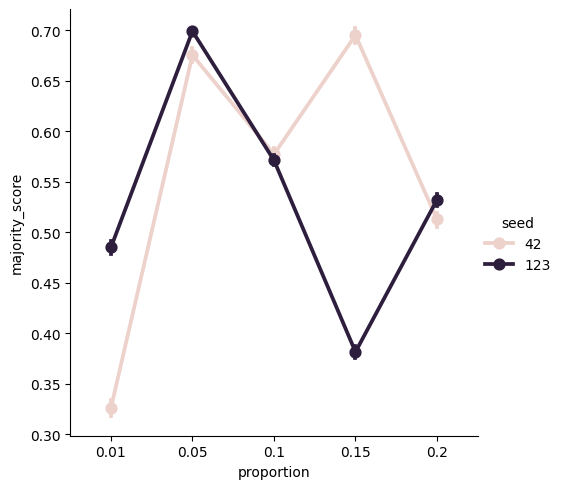

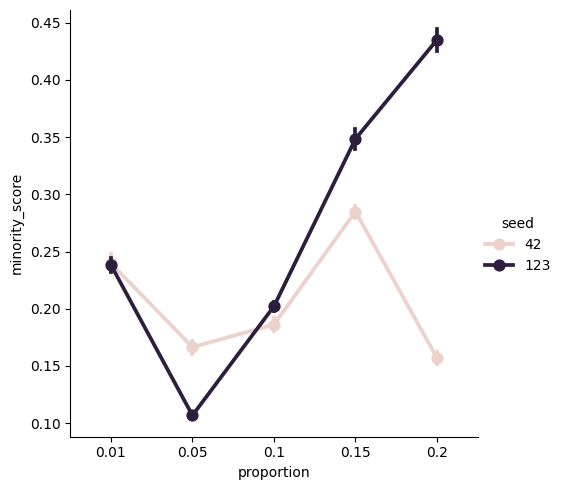

In [7]:
sns.catplot(
    data=combined_MM_df,
    y="majority_score",
    kind="point",
    hue="seed",
    x="proportion",
)

sns.catplot(
    data=combined_MM_df,
    y="minority_score",
    kind="point",
    hue="seed",
    x="proportion",
)

## Comparison

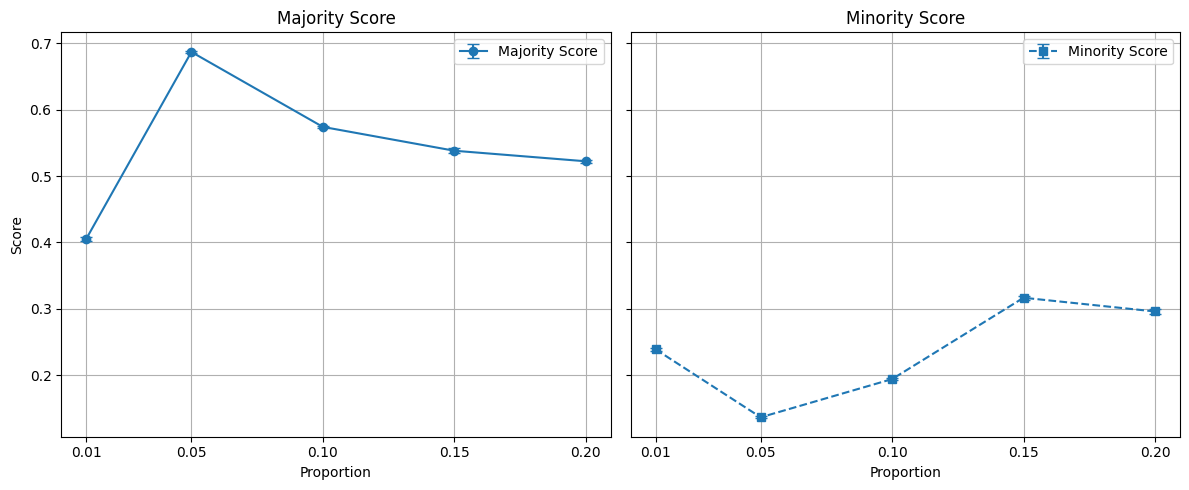

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume your DataFrame is named df

# Group by proportion
grouped = combined_MM_df.groupby("proportion")
x = sorted(combined_MM_df["proportion"].unique())

sr_grouped = combined_SR_df.groupby("proportion")

# Majority
mean_maj = grouped["majority_score"].mean().reindex(x)
sem_maj = grouped["majority_score"].sem().reindex(x)


# Minority
mean_min = grouped["minority_score"].mean().reindex(x)
sem_min = grouped["minority_score"].sem().reindex(x)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Majority Score Plot ---
axs[0].errorbar(x, mean_maj, yerr=sem_maj, marker="o", capsize=4, label="Majority Score")
axs[0].set_title("Majority Score")
axs[0].set_xlabel("Proportion")
axs[0].set_ylabel("Score")
axs[0].grid(True)

# --- Minority Score Plot ---
axs[1].errorbar(x, mean_min, yerr=sem_min, marker="s", linestyle="--", capsize=4, label="Minority Score")
axs[1].set_title("Minority Score")
axs[1].set_xlabel("Proportion")
axs[1].grid(True)

# Shared formatting
for ax in axs:
    ax.set_xticks(x)
    ax.legend()

plt.tight_layout()
plt.show()

MAXMIN [0.23902525 0.13660737 0.19418922 0.31672346 0.29603313]
MAXMIN [0.00272343 0.00158783 0.00173043 0.00269938 0.00388918]
SHAREDREP, k=2 [0.28260828 0.27334897 0.20349519 0.23628745 0.2328407 ]
SHAREDREP, k=2 [0.00228118 0.00214169 0.0020963  0.00229544 0.0021953 ]
SHAREDREP, k=8 [0.26136479 0.30309446 0.32643726 0.26860497 0.28487354]
SHAREDREP, k=8 [0.00216373 0.00210471 0.00242145 0.00189792 0.00230906]
SHAREDREP, k=16 [0.31003696 0.28774536 0.29303261 0.27735902 0.26952434]
SHAREDREP, k=16 [0.00212608 0.00212308 0.00235232 0.00242147 0.00200643]


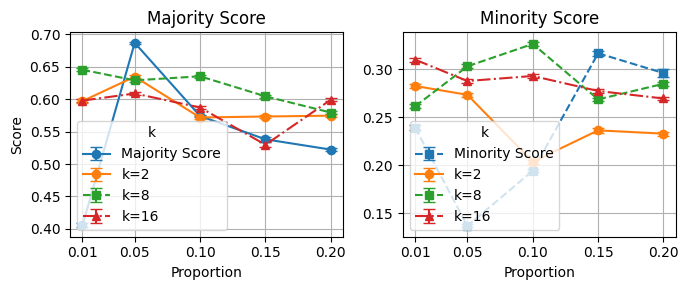

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharey=False)

# Assume your DataFrame is named df
# and contains: 'proportion', 'k', 'majority_score', 'minority_score', etc.
df = combined_SR_df

grouped = combined_MM_df.groupby("proportion")

# Majority
mean_maj = grouped["majority_score"].mean().reindex(x)
sem_maj = grouped["majority_score"].sem().reindex(x)
# Minority
mean_min = grouped["minority_score"].mean().reindex(x)
sem_min = grouped["minority_score"].sem().reindex(x)

print("MAXMIN", mean_min.values)
print("MAXMIN", sem_min.values)
# --- Majority Score Plot ---
axs[0].errorbar(x, mean_maj, yerr=sem_maj, marker="o", capsize=4, label="Majority Score")
axs[0].set_title("Majority Score")
axs[0].set_xlabel("Proportion")
axs[0].set_ylabel("Score")
axs[0].grid(True)

# --- Minority Score Plot ---
axs[1].errorbar(x, mean_min, yerr=sem_min, marker="s", linestyle="--", capsize=4, label="Minority Score")
axs[1].set_title("Minority Score")
axs[1].set_xlabel("Proportion")
axs[1].grid(True)

# Sort values
x = sorted(df["proportion"].unique())
ks = sorted(df["k"].unique())


# Define linestyles/markers for each k
linestyles = ["-", "--", "-.", ":", (0, (3, 1, 1, 1))]
markers = ["o", "s", "^", "v", "D"]

# --- Plot Majority Score ---
for i, k_val in enumerate(ks):
    df_k = df[df["k"] == k_val].groupby("proportion")

    mean_maj = df_k["majority_score"].mean().reindex(x)
    sem_maj = df_k["majority_score"].sem().reindex(x)

    axs[0].errorbar(
        x,
        mean_maj,
        yerr=sem_maj,
        label=f"k={k_val}",
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)],
        capsize=4
    )

axs[0].set_title("Majority Score")
axs[0].set_xlabel("Proportion")
axs[0].set_ylabel("Score")
axs[0].set_xticks(x)
axs[0].grid(True)
axs[0].legend(title="k")

# --- Plot Minority Score ---
for i, k_val in enumerate(ks):
    df_k = df[df["k"] == k_val].groupby("proportion")

    mean_min = df_k["minority_score"].mean().reindex(x)
    sem_min = df_k["minority_score"].sem().reindex(x)

    print(f"SHAREDREP, k={k_val}", mean_min.values)
    print(f"SHAREDREP, k={k_val}", sem_min.values)


    axs[1].errorbar(
        x,
        mean_min,
        yerr=sem_min,
        label=f"k={k_val}",
        linestyle=linestyles[i % len(linestyles)],
        marker=markers[i % len(markers)],
        capsize=4
    )

axs[1].set_title("Minority Score")
axs[1].set_xlabel("Proportion")
axs[1].set_xticks(x)
axs[1].grid(True)
axs[1].legend(title="k")

plt.tight_layout()
plt.show()

In [10]:
# Step 1: MaxMin (minority only) — grouped by proportion only
mm_grouped = combined_MM_df.groupby("proportion")["minority_score"].mean().reset_index()
mm_grouped = mm_grouped.rename(columns={"minority_score": "minority_score_mm"})

# Step 2: SharedPref — grouped by k and proportion
sr_grouped = combined_SR_df.groupby(["k", "proportion"])["minority_score"].mean().reset_index()
sr_grouped = sr_grouped.rename(columns={"minority_score": "minority_score_sr"})

# Step 3: Merge — match on proportion only
merged = pd.merge(sr_grouped, mm_grouped, on="proportion")

# Step 4: Compute percentage increase
merged["percent_increase"] = 100 * (merged["minority_score_sr"] - merged["minority_score_mm"]) / merged["minority_score_mm"]
merged["percent_increase"] = 100 * (merged["minority_score_sr"] - merged["minority_score_mm"]) / merged["minority_score_mm"]
merged["percent_increase"] = merged["percent_increase"].round(2)

# Show result
#merged.to_latex(index=False, float_format="%.2f", escape=False, column_format="lcc", caption="Percentage Increase in Minority Score from MaxMin to SharedPref")
merged

,k,proportion,minority_score_sr,minority_score_mm,percent_increase
0,2,0.01,0.282608,0.239025,18.23
1,2,0.05,0.273349,0.136607,100.10
2,2,0.10,0.203495,0.194189,4.79
3,2,0.15,0.236287,0.316723,-25.40
4,2,0.20,0.232841,0.296033,-21.35
5,8,0.01,0.261365,0.239025,9.35
6,8,0.05,0.303094,0.136607,121.87
7,8,0.10,0.326437,0.194189,68.10
8,8,0.15,0.268605,0.316723,-15.19
9,8,0.20,0.284874,0.296033,-3.77


## Win Rate Plots

In [11]:
import pandas as pd

# Step 1: Merge SR and MM on proportion + question (MM has no k)
sr_merged = pd.merge(
    combined_SR_df,
    combined_gold_df[["question", "minority_score", "majority_score"]],
    #combined_MM_df[["proportion", "question", "minority_score", "majority_score"]],
    on=["question"],
    suffixes=('_sr', '_gold')
)

# Step 2: Compute win for each row
sr_merged["min_win"] = (sr_merged["minority_score_sr"] > sr_merged["minority_score_gold"]).astype(int)
sr_merged["maj_win"] = (sr_merged["majority_score_sr"] > sr_merged["majority_score_gold"]).astype(int)

# Step 3: Compute win rate by k and proportion
sr_win_rates = sr_merged.groupby(["k", "proportion"])[["min_win", "maj_win"]].mean().reset_index()
sr_win_rates["min_win_rate_percent"] = (sr_win_rates["min_win"] * 100).round(2)
sr_win_rates["maj_win_rate_percent"] = (sr_win_rates["maj_win"] * 100).round(2)

# Sem
sem = sr_merged.groupby(["k", "proportion"])[["min_win", "maj_win"]].sem().reset_index()
sr_win_rates["min_win_sem"] = sem["min_win"]
sr_win_rates["maj_win_sem"] = sem["maj_win"]

# Latex
for prop in sr_win_rates["proportion"].unique():
    # Filter and select only the needed columns
    filtered = sr_win_rates[sr_win_rates["proportion"] == prop][["k", "min_win", "maj_win", "min_win_sem", "maj_win_sem"]]
    
    # Clean filename: remove dot from proportion
    filename = f"/home/mb1921/sharedrep-rlhf/figures/gsm8k/sharedrep_ablation/data/winrate_prop_{prop}.csv"
    
    # Save to CSV
    filtered.to_csv(filename, index=False)

# Display
sr_win_rates

,k,proportion,min_win,maj_win,min_win_rate_percent,maj_win_rate_percent,min_win_sem,maj_win_sem
0,2,0.01,0.245451,0.098939,24.55,9.89,0.005925,0.004111
1,2,0.05,0.229151,0.107278,22.92,10.73,0.005787,0.004261
2,2,0.10,0.135898,0.061410,13.59,6.14,0.004718,0.003306
3,2,0.15,0.184610,0.080364,18.46,8.04,0.005342,0.003743
4,2,0.20,0.184610,0.078279,18.46,7.83,0.005342,0.003698
5,8,0.01,0.210008,0.140258,21.00,14.03,0.005608,0.004781
6,8,0.05,0.274450,0.111827,27.45,11.18,0.006144,0.004339
7,8,0.10,0.336240,0.125853,33.62,12.59,0.006505,0.004567
8,8,0.15,0.220811,0.094200,22.08,9.42,0.005711,0.004022
9,8,0.20,0.266679,0.063874,26.67,6.39,0.006089,0.003367


## Win Rate Plots

,k,proportion,min_win,maj_win,min_win_rate_percent,maj_win_rate_percent,min_win_sem,maj_win_sem
0,2,0.01,0.245451,0.098939,24.55,9.89,0.005925,0.004111
1,2,0.05,0.229151,0.107278,22.92,10.73,0.005787,0.004261
2,2,0.10,0.135898,0.061410,13.59,6.14,0.004718,0.003306
3,2,0.15,0.184610,0.080364,18.46,8.04,0.005342,0.003743
4,2,0.20,0.184610,0.078279,18.46,7.83,0.005342,0.003698
5,8,0.01,0.210008,0.140258,21.00,14.03,0.005608,0.004781
6,8,0.05,0.274450,0.111827,27.45,11.18,0.006144,0.004339
7,8,0.10,0.336240,0.125853,33.62,12.59,0.006505,0.004567
8,8,0.15,0.220811,0.094200,22.08,9.42,0.005711,0.004022
9,8,0.20,0.266679,0.063874,26.67,6.39,0.006089,0.003367


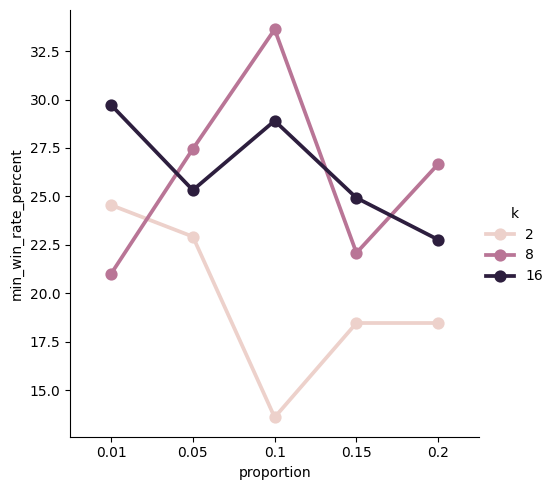

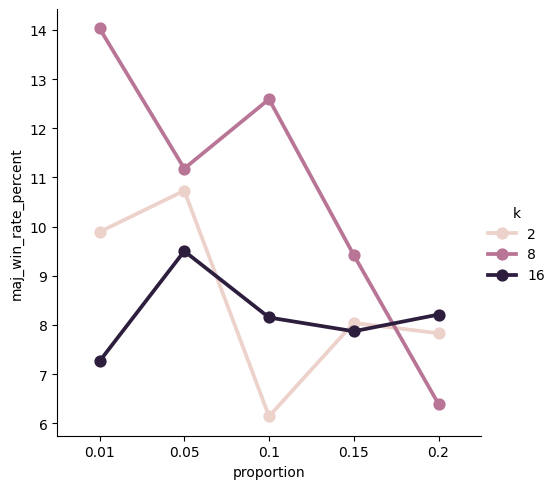

In [69]:
import pandas as pd

# Step 1: Merge SR and MM on proportion + question (MM has no k)
sr_merged = pd.merge(
    combined_SR_df,
    combined_gold_df[["question", "minority_score", "majority_score"]],
    on=["question"],
    suffixes=('_sr', '_gold')
)

# Step 2: Compute win for each row
sr_merged["min_win"] = (sr_merged["minority_score_sr"] > sr_merged["minority_score_gold"]).astype(int)
sr_merged["maj_win"] = (sr_merged["majority_score_sr"] > sr_merged["majority_score_gold"]).astype(int)

# Step 3: Compute win rate by k and proportion
sr_win_rates = sr_merged.groupby(["k", "proportion"])[["min_win", "maj_win"]].mean().reset_index()
sr_win_rates["min_win_rate_percent"] = (sr_win_rates["min_win"] * 100).round(2)
sr_win_rates["maj_win_rate_percent"] = (sr_win_rates["maj_win"] * 100).round(2)

# Sem
sem = sr_merged.groupby(["k", "proportion"])[["min_win", "maj_win"]].sem().reset_index()
sr_win_rates["min_win_sem"] = sem["min_win"]
sr_win_rates["maj_win_sem"] = sem["maj_win"]

sns.catplot(
    data=sr_win_rates,
    x="proportion",
    y="min_win_rate_percent",
    kind="point",
    hue="k",
)

sns.catplot(
    data=sr_win_rates,
    x="proportion",
    y="maj_win_rate_percent",
    kind="point",
    hue="k",
)

sr_win_rates

,proportion,min_win,maj_win,min_win_sem,maj_win_sem
0,0.01,0.199204,0.019143,0.005499,0.001887
1,0.05,0.049280,0.304208,0.002980,0.006335
2,0.10,0.114291,0.046816,0.004381,0.002909
3,0.15,0.305155,0.104246,0.006340,0.004207
4,0.20,0.316528,0.031842,0.006404,0.002417


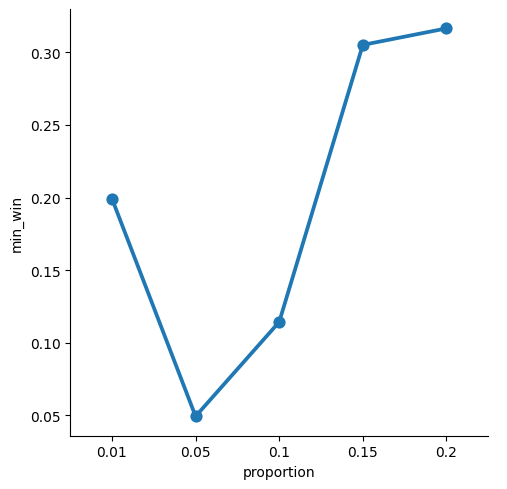

In [73]:
import pandas as pd

# Step 1: Merge SR and MM on proportion + question (MM has no k)
mm_merged = pd.merge(
    combined_MM_df,
    combined_gold_df[["question", "minority_score", "majority_score"]],
    on=["question"],
    suffixes=('_sr', '_gold')
)

# Step 2: Compute win for each row
mm_merged["min_win"] = (mm_merged["minority_score_sr"] > mm_merged["minority_score_gold"]).astype(int)
mm_merged["maj_win"] = (mm_merged["majority_score_sr"] > mm_merged["majority_score_gold"]).astype(int)

# Step 3: Compute win rate by k and proportion
mm_win_rates = mm_merged.groupby(["proportion"])[["min_win", "maj_win"]].mean().reset_index()

# Sem
sem = mm_merged.groupby(["proportion"])[["min_win", "maj_win"]].sem().reset_index()
mm_win_rates["min_win_sem"] = sem["min_win"]
mm_win_rates["maj_win_sem"] = sem["maj_win"]

sns.catplot(
    data=mm_win_rates,
    x="proportion",
    y="min_win",
    kind="point",
)

# Display
mm_win_rates

In [82]:
ks

[np.int64(2), np.int64(8), np.int64(16)]

#### Win Rate

In [75]:
k=16
win_rate_comparison = pd.merge(
    mm_win_rates[["proportion", "min_win", "maj_win"]],
    sr_win_rates[sr_win_rates["k"]==k][["proportion", "min_win", "maj_win"]],
    on=["proportion"],
    suffixes=('_mm', '_sr')
)

win_rate_comparison

,proportion,min_win_mm,maj_win_mm,min_win_sr,maj_win_sr
0,0.01,0.199204,0.019143,0.297195,0.072593
1,0.05,0.049280,0.304208,0.253222,0.094958
2,0.10,0.114291,0.046816,0.289045,0.081501
3,0.15,0.305155,0.104246,0.249242,0.078658
4,0.20,0.316528,0.031842,0.227635,0.082070


#### Mean Score

In [76]:
# SharedRep
k = 16
df_k = combined_SR_df[combined_SR_df["k"] == k].groupby("proportion")

x = sorted(df_k["proportion"].unique())
mean_min = df_k["minority_score"].mean()
sem_min = df_k["minority_score"].sem()
mean_maj = df_k["majority_score"].mean()
sem_maj = df_k["majority_score"].sem()

shared_rep_mean_score = pd.DataFrame({
    "proportion": mean_min.index,
    "mean_minority_score": mean_min.values,
    "sem_minority_score": sem_min.values,
    "mean_majority_score": mean_maj.values,
    "sem_majority_score": sem_maj.values
})


# Maxmin
mm_grouped = combined_MM_df.groupby("proportion")

x = sorted(mm_grouped["proportion"].unique())
mean_min = mm_grouped["minority_score"].mean()
sem_min = mm_grouped["minority_score"].sem()
mean_maj = mm_grouped["majority_score"].mean()
sem_maj = mm_grouped["majority_score"].sem()

maxmin_mean_score = pd.DataFrame({
    "proportion": mean_min.index,
    "mean_minority_score": mean_min.values,
    "sem_minority_score": sem_min.values,
    "mean_majority_score": mean_maj.values,
    "sem_majority_score": sem_maj.values
})


mean_score_comparison = pd.merge(
    maxmin_mean_score,
    shared_rep_mean_score,
    on=["proportion"],
    suffixes=('_mm', '_sr')
)
mean_score_comparison


,proportion,mean_minority_score_mm,sem_minority_score_mm,mean_majority_score_mm,sem_majority_score_mm,mean_minority_score_sr,sem_minority_score_sr,mean_majority_score_sr,sem_majority_score_sr
0,0.01,0.239025,0.002723,0.405416,0.003150,0.310037,0.002126,0.597923,0.002213
1,0.05,0.136607,0.001588,0.687061,0.001856,0.287745,0.002123,0.608934,0.002378
2,0.10,0.194189,0.001730,0.574142,0.002093,0.293033,0.002352,0.587270,0.002454
3,0.15,0.316723,0.002699,0.538222,0.003868,0.277359,0.002421,0.529822,0.003575
4,0.20,0.296033,0.003889,0.522338,0.002223,0.269524,0.002006,0.599178,0.002232


#### Final Table

In [77]:
gsm8k_table = pd.merge(
    mean_score_comparison,
    win_rate_comparison,
    on=["proportion"],
    suffixes=('_mm', '_sr')
)
gsm8k_table

,proportion,mean_minority_score_mm,sem_minority_score_mm,mean_majority_score_mm,sem_majority_score_mm,mean_minority_score_sr,sem_minority_score_sr,mean_majority_score_sr,sem_majority_score_sr,min_win_mm,maj_win_mm,min_win_sr,maj_win_sr
0,0.01,0.239025,0.002723,0.405416,0.003150,0.310037,0.002126,0.597923,0.002213,0.199204,0.019143,0.297195,0.072593
1,0.05,0.136607,0.001588,0.687061,0.001856,0.287745,0.002123,0.608934,0.002378,0.049280,0.304208,0.253222,0.094958
2,0.10,0.194189,0.001730,0.574142,0.002093,0.293033,0.002352,0.587270,0.002454,0.114291,0.046816,0.289045,0.081501
3,0.15,0.316723,0.002699,0.538222,0.003868,0.277359,0.002421,0.529822,0.003575,0.305155,0.104246,0.249242,0.078658
4,0.20,0.296033,0.003889,0.522338,0.002223,0.269524,0.002006,0.599178,0.002232,0.316528,0.031842,0.227635,0.082070


In [88]:
29.72-19.92

9.799999999999997